In [18]:
#libraries
import numpy as np
import sympy as sp
import scipy as sc
from numpy import linalg 
from scipy.integrate import dblquad
from scipy.integrate import quad
from scipy.misc import derivative
import matplotlib.pyplot as plt

Prescribed functions and constants, direct and inverse problem accurate solutions: $$u(x,t)=e^x t^3, q(x)=1, \varepsilon=1, a=1, x_0=0, T=1, f(x)=e^x, g(t)=6t-2t^3$$

In [19]:
#defined variables and functions
eps = 1
a = 1
x0 = 0
T = 1

def q(x):
    return 1
def u(x,t):
    return np.exp(x) * t**3
def p(t):
    return u(x0, t)
def f(x):
    return np.exp(x)
def g(t):
    return t * (6 - 2 * t**2)

Initial approximation: $$u_0(x, t)=e^x t^2, g_0(t)=6-2t^2$$

In [20]:
#initial approximation
def u0(x, t):
    return np.exp(x) * t**2
def g0(t):
    return 6 - 2 * t**2

In [21]:
#Time and space grid size
M = 30
h = T/M

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
In case of $a=1$ and $x_0=0$: $U(x,t)=\int_0^t \int_{x-(t-\tau)}^{x+(t-\tau)} F(s,\tau)dsd\tau$

$\Delta_T = \{(t,x): 0\leq t \leq T, -T=t\leq x \leq T-t\}$

Grid step: $h$ (both space-wise and timing-wise)

$t_j=jh;\ j = 0, ..., M;\ t_M = T$

$x_k = kh;\ k=-M, -(M-1), ..., -1, 0, 1, ..., M-1, M$

Grid analogue -  $(t_j, x_k): 0=t_0\leq t_j \leq t_m = T,\ j = 0, ..., M; \ -T+t_j=-t_m+t_j \leq x_k \leq t_m - t_j = T - t_j;\ k=-M, -(M-1), ..., -1, 0, 1, ..., M-1, M.$

Consequently, in $(x_k, t_j)$ fix point: $U(x_k,t_j)=\int_0^{t_j} \int_{x_k-(t_j-\tau)}^{x_k+(t_j-\tau)} F(s,\tau)dsd\tau$

Quadrature formula of lower Riemann sum:$\ U_{ap}(x_k, t_j) = \sum_{m=0}^{j-1} h \sum_{n=-j+m}^{j-m}hF(x_k+nh, t_m)$

In [22]:
#double integral calculation with quadrature formula of lower Riemann sum
def DoubleIntegral(F):
    Sum = np.zeros((2 * M + 1, M + 1))

    for j in range(1, M + 1):
        for k in range(-M, M + 1):
            for m in range(j):
                for n in range(-j + m, j - m + 1):
                    if k + M + n <= 2 * M and k + M + n >= 0:
                        Sum[k + M][j] += h * h * F[k + n + M][m]
    return Sum

$$u_{n+1}(x,t)=\frac{1}{2a}\int_0^t\int_{x-a(t-\tau)}^{x+a(t-\tau)}\varepsilon q(s)u_n(s,\tau)dsd\tau+\frac{1}{2a}\int_0^t\int_{x-a(t-\tau)}^{x+a(t-\tau)}f(s)g_n(\tau)dsd\tau$$


In [23]:
# u_n+1 calculating
U0 = np.zeros((2 * M + 1, M + 1))
derU0 = np.zeros((2 * M + 1, M + 1))
Q = np.zeros((2 * M + 1))
derQ = np.zeros((2 * M + 1))
F = np.zeros((2 * M + 1))
derF = np.zeros((2 * M + 1))
G0 = np.zeros((M + 1))
derderP = np.zeros((M + 1))
P = np.zeros((M + 1))

for j in range(0, M + 1):
    G0[j] = g0(j * h)
    P[j] = p(j * h)
    derderP[j] = derivative(p, j * h, dx = 1.0, n = 2)
    for k in range(-M, M + 1):
        U0[k + M][j] = u0(k * h, j * h)
        derU0[k + M][j] = u0(k * h, j * h)

for k in range(-M, M + 1):
    Q[k + M] = q(k * h)
    derQ[k + M] = derivative(q, k * h)
    F[k + M] = f(k * h)
    derF[k + M] = derivative(f, k * h)

def part1(un, eps, a, Q):
    Sum = np.zeros((2 * M + 1, M + 1))
    for j in range(0, M + 1): #
        for k in range(-M, M + 1):
            Sum[k + M][j] += eps / (2 * a) * Q[k + M] * un[k + M][j]
    return Sum

def part2(gn, a, F):
    Sum = np.zeros((2 * M + 1, M + 1))
    for j in range(0, M + 1): #
        for k in range(-M, M + 1):
            Sum[k + M][j] += 1 / (2 * a) * F[k + M] * gn[j]
    return Sum

unplus1 = np.sum([DoubleIntegral(part1(U0, eps, a, Q)), DoubleIntegral(part2(G0, a, F))], axis = 0)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
In case of $a=1$ and $x_0=0$: $U(t)=\int_0^t F(\tau)d\tau$

$\Delta_T = \{t: 0\leq t \leq T\}$

Grid step: $h$

$t_j=jh;\ j = 0, ..., M;\ t_M = T$

Grid analogue -  $t_j: 0=t_0\leq t_j \leq t_m = T,\ j = 0, ..., M;$

Consequently, in $t_j$ fix point: $U(t_j)=\int_0^{t_j} F(\tau)d\tau$

Quadrature formula of lower Riemann sum:$\ U_{ap}(t_j) = \sum_{m=0}^{j-1} h F(t_m)$

In [24]:
#integral calculation with quadrature formula of lower Riemann sum
def SpecialIntegralPlus(F):
    Sum = np.zeros((2 * M + 1, M + 1))
    for j in range(1, M + 1):
        for k in range(-M, M + 1):
            for m in range(j):
                if k + j - m + M <= 2 * M and k + j - m + M >= 0:
                    Sum[k + M][j] += h * F[k + j - m + M][m]
    return Sum

def SpecialIntegralMinus(F):
    Sum = np.zeros((2 * M + 1, M + 1))
    for j in range(1, M + 1):
        for k in range(-M, M + 1):
            for m in range(j):
                if k - j + m + M <= 2 * M and k - j + m + M >= 0:
                    Sum[k + M][j] += h * F[k - j + m + M][m]
    return Sum

$$\frac{\partial u_{n+1}}{\partial x}(x,t)=\frac{\varepsilon}{2a}\int_0^t[q(x+a(t-\tau))u_n(x+a(t-\tau),\tau)-q(x-a(t-\tau))u_n(x-a(t-\tau),\tau)]d\tau+\frac{1}{2a}*\int_0^t g_n(\tau)[f(x+a(t-\tau))-f(x-a(t-\tau))]d\tau$$

In [25]:
# u_n+1 derivative with respect to x calculation
der1 = np.sum([SpecialIntegralPlus(part1(U0, eps, a, Q)), (-1) * SpecialIntegralMinus(part1(U0, eps, a, Q))], axis = 0)
der2 = np.sum([SpecialIntegralPlus(part2(G0, a, F)), (-1) * SpecialIntegralMinus(part2(G0, a, F))], axis = 0)
derunplus1 = np.sum([der1, der2], axis = 0)

In [26]:
# integral calculation for g_n+1
def LastIntegralPlus(F):
    Sum = np.zeros((2 * M + 1, M + 1))
    for j in range(1, M + 1): 
        for m in range(j):
            if j - m + M <= 2 * M and j - m + M >= 0:
                Sum[M][j] += h * F[j - m + M][m]
    return Sum

def LastIntegralMinus(F):
    Sum = np.zeros((2 * M + 1, M + 1))
    for j in range(1, M + 1): 
        for m in range(j):
            if -j + m + M <= 2 * M and -j + m + M >= 0:
                Sum[M][j] += h * F[-j + m + M][m]
    return Sum

$$g_{n+1}(t)=-\frac{a\varepsilon}{2f(x_0)}\int_0^t [q^{'}(x_0+a(t-\tau))u_{n+1}(x_0+a(t-\tau),\tau)+q(x_0+a(t-\tau))\frac{\partial u_{n+1}}{\partial x}(x_0+a(t-\tau),\tau)- q^{'}(x_0-a(t-\tau))u_{n+1}(x_0-a(t-\tau),\tau)-q(x_0-a(t-\tau))\frac{\partial u_{n+1}}{\partial x}(x_0-a(t-\tau),\tau)]d\tau-\frac{a}{2f(x_0)}*\int_0^t g_n(\tau)[f^{'}(x_0+a(t-\tau))-f^{'}(x_0-a(t-\tau))]d\tau + \frac{p^{''}(t)}{f(x_0)}-\frac{\varepsilon q(x_0)p(t)}{f(x_0)}$$

In [27]:
# required functions for g_n+1 calculation
def first(a, eps, f, x0, derQ, U1, Q, derU1):
#def first(a, eps, f, x0, derQ, U0, Q, derU0):
    Sum = np.zeros((2 * M + 1, M + 1))
    for j in range(0, M + 1): #
        for k in range(-M, M + 1):
            Sum[k + M][j] += (-1) * a * eps / (2 * f(x0)) * (derQ[k + M] * U1[k + M][j] + Q[k + M] * derU1[k + M][j])
            #Sum[k + M][j] += (-1) * a * eps / (2 * f(x0)) * (derQ[k + M] * U0[k + M][j] + Q[k + M] * derU0[k + M][j])
    return Sum

def second(a, f, x0, G0, derF):
    Sum = np.zeros((2 * M + 1, M + 1))
    for j in range(0, M + 1): #
        for k in range(-M, M + 1):
            Sum[k + M][j] += (-1) * a / (2 * f(x0)) * G0[j] * derF[k + M]
    return Sum 

def third(derderP, f, x0, eps, q, U1, P):
    Sum = np.zeros((2 * M + 1, M + 1))
    for j in range(0, M + 1):
        for k in range(-M, M + 1):
            Sum[k + M][j] += derderP[j] / f(x0) - eps * q(x0) * U1[x0 + M][j] / f(x0)
            #Sum[k + M][j] += derderP[j] / f(x0) - eps * q(x0) * P[j] / f(x0)
    return Sum 

In [28]:
# g_n+1 calculation
def Gnplus1(unplus1, derunplus1, G0):
    Sum = np.zeros((M+1))
    for j in range (0, M + 1):
        Sum[j] += LastIntegralPlus(first(a, eps, f, x0, derQ, unplus1, Q, derunplus1))[x0 + M][j] + LastIntegralMinus((-1) * first(a, eps, f, x0, derQ, unplus1, Q, derunplus1))[x0 + M][j]
        Sum[j] += LastIntegralPlus(second(a, f, x0, G0, derF))[x0 + M][j] + LastIntegralMinus((-1) * second(a, f, x0, G0, derF))[x0 + M][j]
        Sum[j] += third(derderP, f, x0, eps, q, unplus1, P)[x0 + M][j]
    return Sum
gnplus11 = Gnplus1(unplus1, derunplus1, G0);
#gnplus11 = Gnplus1(U0, derU0, G0);

In [29]:
#iteration process, where i is iteration number
UN = U0
derUN=derU0
GN = G0
for i in range(2):
    unplus1 = np.sum([DoubleIntegral(part1(UN, eps, a, Q)), DoubleIntegral(part2(GN, a, F))], axis = 0)
    der1 = np.sum([SpecialIntegralPlus(part1(UN, eps, a, Q)), (-1) * SpecialIntegralMinus(part1(UN, eps, a, Q))], axis = 0)
    der2 = np.sum([SpecialIntegralPlus(part2(GN, a, F)), (-1) * SpecialIntegralMinus(part2(GN, a, F))], axis = 0)
    derunplus1 = np.sum([der1, der2], axis = 0)
    gnplus1 = Gnplus1(unplus1, derunplus1, GN);
    #gnplus1 = Gnplus1(UN, derUN, GN);
    UN = unplus1
    derUN = derunplus1
    GN = gnplus1
    gnplus12 = gnplus1

In [30]:
#iteration process, where i is iteration number
UN = U0
GN = G0
for i in range(10):
    unplus1 = np.sum([DoubleIntegral(part1(UN, eps, a, Q)), DoubleIntegral(part2(GN, a, F))], axis = 0)
    der1 = np.sum([SpecialIntegralPlus(part1(UN, eps, a, Q)), (-1) * SpecialIntegralMinus(part1(UN, eps, a, Q))], axis = 0)
    der2 = np.sum([SpecialIntegralPlus(part2(GN, a, F)), (-1) * SpecialIntegralMinus(part2(GN, a, F))], axis = 0)
    derunplus1 = np.sum([der1, der2], axis = 0)
    gnplus1 = Gnplus1(unplus1, derunplus1, GN);
    #gnplus1 = Gnplus1(UN, derUN, GN);
    UN = unplus1
    derUN = derunplus1
    GN = gnplus1
    gnplus110 = gnplus1

In [31]:
#iteration process, where i is iteration number
UN = U0
GN = G0
for i in range(9):
    unplus1 = np.sum([DoubleIntegral(part1(UN, eps, a, Q)), DoubleIntegral(part2(GN, a, F))], axis = 0)
    der1 = np.sum([SpecialIntegralPlus(part1(UN, eps, a, Q)), (-1) * SpecialIntegralMinus(part1(UN, eps, a, Q))], axis = 0)
    der2 = np.sum([SpecialIntegralPlus(part2(GN, a, F)), (-1) * SpecialIntegralMinus(part2(GN, a, F))], axis = 0)
    derunplus1 = np.sum([der1, der2], axis = 0)
    gnplus1 = Gnplus1(unplus1, derunplus1, GN);
    UN = unplus1
    GN = gnplus1
    gnplus9 = gnplus1

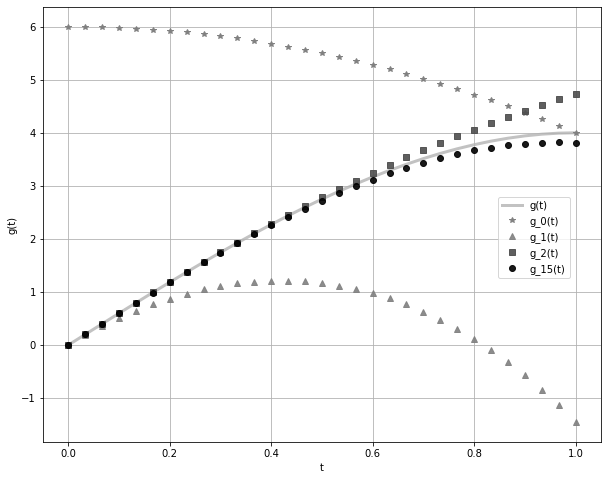

In [32]:
#graphing
Time = []
RealG = []
First = []

for i in range(M+1):
    Time.append(i * h)
    RealG.append(g(i * h))
    First.append(g0(i * h))
    
    
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(Time, RealG, color='0.7', label = "g(t)", linewidth = 3, alpha = 0.8)
plt.plot(Time, First, '*', color = '0.5', label = "g_0(t)", linewidth = 3)
plt.plot(Time, gnplus11, '^', color = '0.5', label = "g_1(t)", linewidth = 3, alpha = 0.9)
plt.plot(Time, gnplus12, 's', color = '0.3', label = "g_2(t)", linewidth = 3, alpha = 0.9)
plt.plot(Time, gnplus110, 'bo', color = '0', label = "g_15(t)", linewidth = 3, alpha = 0.9)
plt.xlabel("t")
plt.ylabel("g(t)")
plt.legend(bbox_to_anchor = (0.75, 0.4), bbox_transform = plt.gcf().transFigure)
plt.grid()
plt.show()

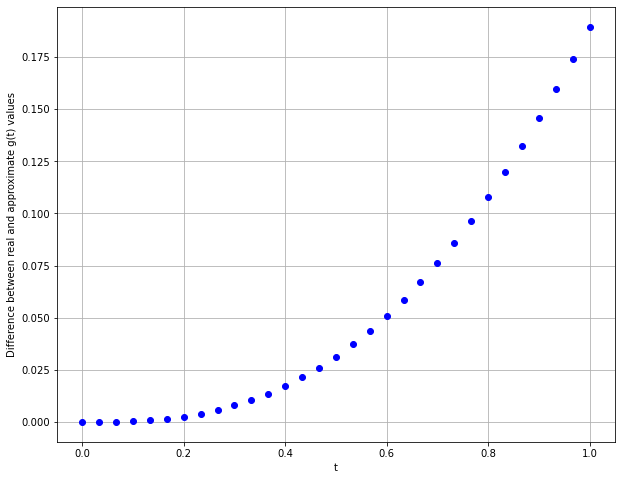

In [33]:
difference = []
for i in range(M + 1):
    difference.append(np.abs(RealG[i] - gnplus110[i]))

plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(Time, difference, 'bo', color = 'blue')
plt.xlabel("t")
plt.ylabel("Difference between real and approximate g(t) values")
plt.grid()
plt.show()